In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
data = pd.read_csv("creditcard.csv")
pd.options.display.max_columns = None
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


In [38]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [41]:
data = data.drop(['Time'], axis =1)

In [11]:
data.duplicated().any()

True

In [12]:
data = data.drop_duplicates()

In [44]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


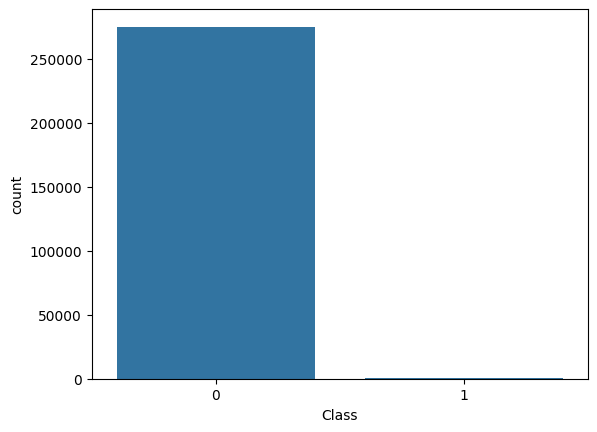

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class', data=data)
plt.show()

In [14]:
X = data.drop('Class', axis=1)
y = data['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# 3. LOGISTIC REGRESSION
print("========== LOGISTIC REGRESSION ==========")
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

========== LOGISTIC REGRESSION ==========
Confusion Matrix:
 [[53804  1234]
 [    9    86]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9776    0.9886     55038
           1     0.0652    0.9053    0.1216        95

    accuracy                         0.9775     55133
   macro avg     0.5325    0.9414    0.5551     55133
weighted avg     0.9982    0.9775    0.9871     55133

Accuracy: 0.9774545190720622


In [17]:
# 4. DECISION TREE
print("\n========== DECISION TREE ==========")
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


========== DECISION TREE ==========
Confusion Matrix:
 [[55010    28]
 [   37    58]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9995    0.9994     55038
           1     0.6744    0.6105    0.6409        95

    accuracy                         0.9988     55133
   macro avg     0.8369    0.8050    0.8201     55133
weighted avg     0.9988    0.9988    0.9988     55133

Accuracy: 0.9988210327752889


In [18]:
# 5. RANDOM FOREST
print("\n========== RANDOM FOREST ==========")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


========== RANDOM FOREST ==========
Confusion Matrix:
 [[55032     6]
 [   29    66]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     55038
           1     0.9167    0.6947    0.7904        95

    accuracy                         0.9994     55133
   macro avg     0.9581    0.8473    0.8951     55133
weighted avg     0.9993    0.9994    0.9993     55133

Accuracy: 0.9993651714943863


In [19]:
# Undersampling

normal = data[data['Class']==0]
fraud = data[data['Class']==1]

normal.shape

fraud.shape

(473, 30)

In [20]:
normal_sample = normal.sample(n=473)

normal_sample.shape

(473, 30)

In [21]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.432440,0.974218,1.441864,-0.224065,0.128069,-0.384747,0.586738,0.111937,-0.604909,-0.138091,0.970330,0.431034,-0.178951,0.355342,0.192042,0.500739,-0.754519,0.274354,0.429858,0.108163,-0.199993,-0.558492,-0.071953,-0.026677,-0.185743,0.075006,0.259653,0.107062,-0.338916,0
1,1.973519,-0.304290,-1.856680,0.450066,0.281551,-0.798946,0.361051,-0.196249,0.389101,0.332350,0.068258,-0.055189,-1.888008,0.954751,-0.928241,-0.155852,-0.414498,0.071721,0.605790,-0.232942,0.002371,-0.007735,-0.025133,-0.486935,0.173283,0.390167,-0.108307,-0.084027,-0.133415,0
2,1.240132,0.662787,-0.240797,1.311547,0.022980,-1.196858,0.291526,-0.239547,-0.069057,-0.563396,0.023168,-0.098975,-0.109984,-1.036932,1.068071,0.509347,0.675883,0.477448,-0.580470,-0.110549,-0.053236,-0.086185,-0.118897,0.269201,0.689386,-0.326973,0.031364,0.051030,-0.349231,0
3,2.273474,-1.495445,-0.974969,-1.753560,-1.098501,-0.030900,-1.370950,0.055335,-1.236677,1.742907,0.210700,-0.605779,-0.243752,-0.202098,-0.681001,-0.137490,0.099210,0.686465,0.259960,-0.427007,-0.143892,0.007928,0.237713,0.310973,-0.237733,-0.206144,0.007136,-0.054457,-0.282863,0
4,-21.085740,-24.099730,-3.641244,9.843366,8.943417,-5.491922,-7.383989,1.898070,-0.062205,0.674612,1.673774,2.463611,1.109249,2.268878,2.906036,0.497306,1.842865,-1.247857,-0.497311,1.045582,0.396955,-2.046300,-8.571397,-0.094725,-2.225591,0.016300,2.030435,-4.700008,-0.217095,0


In [22]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [23]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# 3. LOGISTIC REGRESSION
print("========== LOGISTIC REGRESSION (Undersampling) ==========")
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

========== LOGISTIC REGRESSION (Undersampling) ==========
Confusion Matrix:
 [[94  1]
 [ 9 86]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9126    0.9895    0.9495        95
           1     0.9885    0.9053    0.9451        95

    accuracy                         0.9474       190
   macro avg     0.9506    0.9474    0.9473       190
weighted avg     0.9506    0.9474    0.9473       190

Accuracy: 0.9473684210526315


In [26]:
# 4. DECISION TREE
print("\n========== DECISION TREE (Undersampling) ==========")
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


========== DECISION TREE (Undersampling) ==========
Confusion Matrix:
 [[88  7]
 [ 6 89]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9362    0.9263    0.9312        95
           1     0.9271    0.9368    0.9319        95

    accuracy                         0.9316       190
   macro avg     0.9316    0.9316    0.9316       190
weighted avg     0.9316    0.9316    0.9316       190

Accuracy: 0.9315789473684211


In [27]:
# 5. RANDOM FOREST
print("\n========== RANDOM FOREST (Undersampling) ==========")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


========== RANDOM FOREST (Undersampling) ==========
Confusion Matrix:
 [[94  1]
 [ 9 86]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9126    0.9895    0.9495        95
           1     0.9885    0.9053    0.9451        95

    accuracy                         0.9474       190
   macro avg     0.9506    0.9474    0.9473       190
weighted avg     0.9506    0.9474    0.9473       190

Accuracy: 0.9473684210526315


In [28]:
# Oversampling

X = data.drop('Class', axis = 1)
y= data['Class']

X.shape
y.shape

(275663,)

In [29]:
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X,y)

y_res.value_counts()

,count
Class,
0,275190
1,275190


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# 3. LOGISTIC REGRESSION
print("========== LOGISTIC REGRESSION (Oversampling) ==========")
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

========== LOGISTIC REGRESSION (Oversampling) ==========
Confusion Matrix:
 [[53804  1234]
 [    9    86]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9776    0.9886     55038
           1     0.0652    0.9053    0.1216        95

    accuracy                         0.9775     55133
   macro avg     0.5325    0.9414    0.5551     55133
weighted avg     0.9982    0.9775    0.9871     55133

Accuracy: 0.9774545190720622


In [32]:
# 4. DECISION TREE
print("\n========== DECISION TREE (Oversampling) ==========")
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


========== DECISION TREE (Oversampling) ==========
Confusion Matrix:
 [[55010    28]
 [   37    58]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9995    0.9994     55038
           1     0.6744    0.6105    0.6409        95

    accuracy                         0.9988     55133
   macro avg     0.8369    0.8050    0.8201     55133
weighted avg     0.9988    0.9988    0.9988     55133

Accuracy: 0.9988210327752889


In [33]:
# 5. RANDOM FOREST
print("\n========== RANDOM FOREST (Oversampling) ==========")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


========== RANDOM FOREST (Oversampling) ==========
Confusion Matrix:
 [[55032     6]
 [   29    66]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     55038
           1     0.9167    0.6947    0.7904        95

    accuracy                         0.9994     55133
   macro avg     0.9581    0.8473    0.8951     55133
weighted avg     0.9993    0.9994    0.9993     55133

Accuracy: 0.9993651714943863
